In [30]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift

def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

# shift < 0 means that y starts 'shift' time steps before x # shift > 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert x.shape[-1] == y.shape[-1]
    c = cross_correlation_using_fft(x, y)
    assert c.shape[-1] == x.shape[-1]
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift


def align(target,ref):
    assert target.ndim == 2, "target.ndim != 2"
    assert ref.ndim == 2, "ref.ndim != 2"

    tau = compute_shift(target[0,:],ref[0,:])

   # print("{} {} | {}".format(target.shape,ref.shape,tau))

    n_sample = target.shape[-1]

    data_synced  = np.zeros_like(target)
    print(tau)
    if tau > 0 : 
        data_synced[:,tau:] = target[:,:n_sample-tau]
    else :
        data_synced[:,:n_sample+tau] = target[:,-tau:n_sample]
        
    return data_synced, tau

In [31]:
import librosa as rs
import matplotlib.pyplot as plt   
import IPython.display as ipd

## Data Load

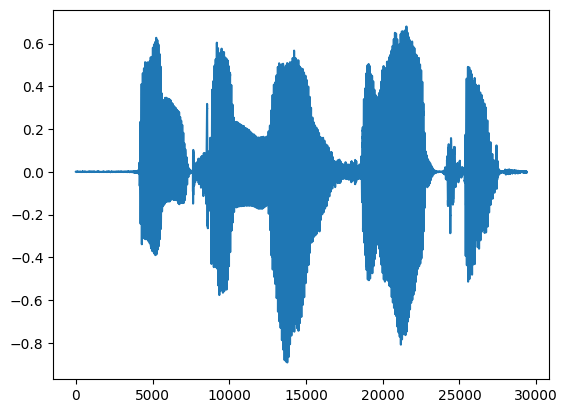

In [32]:
path_sample = "sample/female_1.wav"
sample, _ = rs.load(path_sample,sr=16000)
plt.figure()
plt.plot(sample)

#ax = plt.subplot(2,1,1)
#plt.subplots_adjust(hspace=1)


## Delayed

-8000


Text(0.5, 1.0, 'aligned')

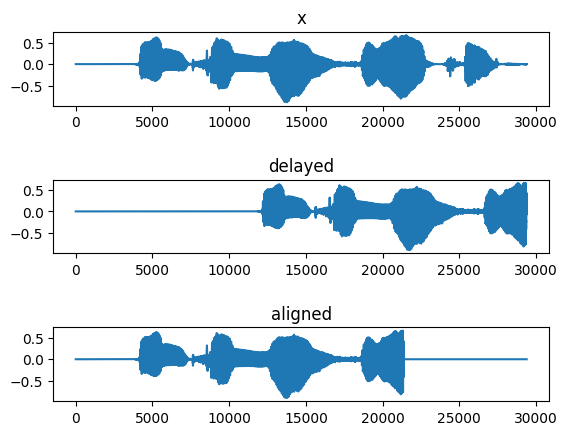

In [35]:
sample, _ = rs.load(path_sample,sr=16000)
n_delay = 8000
delayed = np.pad(sample, (n_delay, 0), 'constant', constant_values=(0, 0))
delayed = delayed[:len(sample)]
ax = plt.subplot(3,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(sample)
ax.set_title("x")

ax = plt.subplot(3,1,2)
plt.plot(delayed)
ax.set_title("delayed")


aligned,tau = align(np.expand_dims(delayed,0),np.expand_dims(sample,0))

ax = plt.subplot(3,1,3)
plt.plot(aligned[0])
ax.set_title("aligned")

## Advanced

8000


Text(0.5, 1.0, 'aligned')

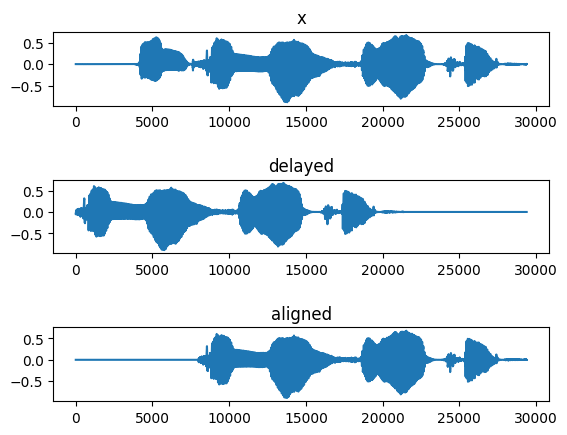

In [38]:
sample, _ = rs.load(path_sample,sr=16000)
n_delay = 8000
delayed = np.zeros_like(sample)
delayed[:len(delayed)-n_delay] = sample[n_delay:]
ax = plt.subplot(3,1,1)
plt.subplots_adjust(hspace=1)
plt.plot(sample)
ax.set_title("x")

ax = plt.subplot(3,1,2)
plt.plot(delayed)
ax.set_title("delayed")


aligned,tau = align(np.expand_dims(delayed,0),np.expand_dims(sample,0))

ax = plt.subplot(3,1,3)
plt.plot(aligned[0])
ax.set_title("aligned")